# Shopify Internship 

Thank you for taking the time to review this challenge and I appreciate the opportunity!

**Alex Fioto**

<a id='question1'></a>
## Question 1
[Skip to Question 2](#question2)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

**Averages are sensitive to outliers. If there are outliers in the data, the mean might not be the best metric.**

2)What metric would you report for this dataset?

**Median might be a better metric in this case.**

3)What is its value?

**The median order value is $284.00**



In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# reading in data
df = pd.read_csv('/Users/alexander.fioto/datasets/shopify/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [24]:
# inspecting the first few rows the data
df.head(3)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56


In [25]:
# identifying there is no missing data and checking the datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [26]:
# quick describe method shows there is a wide order_amount. 
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [27]:
order_amount_avg = df['order_amount'].mean()
print(f'The naive average order amount is: {order_amount_avg}')

The naive average order amount is: 3145.128


Plotting the data helps understanding 

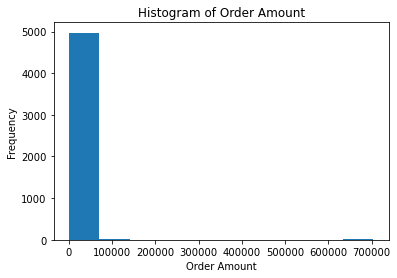

In [28]:
# It seems as though there are outliers.
plt.hist(df['order_amount'])
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Order Amount');

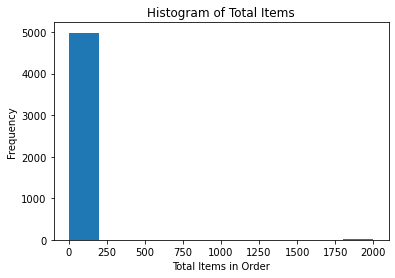

In [29]:
plt.hist(df['total_items'])
plt.xlabel('Total Items in Order')
plt.ylabel('Frequency')
plt.title('Histogram of Total Items');

Generally, it seems the median order would be a better metric to use.

In [30]:
order_amount_median = df['order_amount'].median()
print(f'The median order amount is: {order_amount_median}')

The median order amount is: 284.0


## For fun, below is some additional exploratory analysis.
[Skip to SQL Questions](#question2)

While most orders only include one or two pairs of shoes, there are 17 orders of 2000 pairs of sneakers.

In [31]:
df[['total_items']].value_counts(ascending=True)

total_items
8                 1
6                 9
2000             17
5                77
4               293
3               941
1              1830
2              1832
dtype: int64

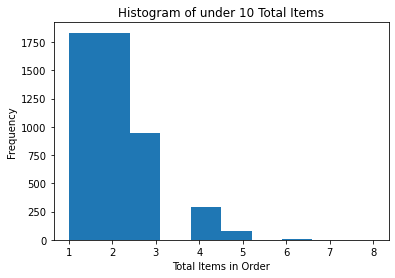

In [32]:
# This is a histogram if we removed those 2000 item orders.
df[df['total_items']<10]['total_items'].plot(kind='hist')
plt.xlabel('Total Items in Order')
plt.ylabel('Frequency')
plt.title('Histogram of under 10 Total Items');

In [33]:
# This is the average order amount when filtering out the large orders. Still seems high.
round(df[df['total_items']<10]['order_amount'].mean(), 2)

754.09

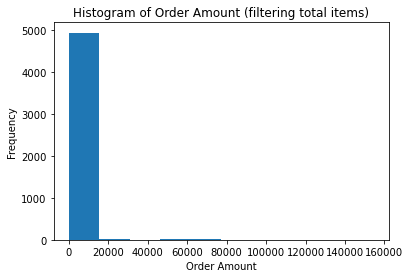

In [34]:
# Filtering as before but plotting the order amount.
df[df['total_items']<10]['order_amount'].plot(kind='hist')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Order Amount (filtering total items)');

There are some orders amounts that are significantly larger than others.

In [35]:
# Filtering for under 10 total items and over $1000 order amount.
df[(df['total_items']<10) & (df['order_amount'] > 1000)].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42


Since each shop only sells one model of shoe, let's find the price for each shop's shoe model.

In [36]:
# Creating new column for price_per_shoe
df['price_per_shoe'] = df['order_amount'] / df['total_items']

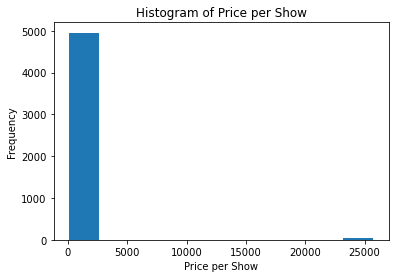

In [37]:
plt.hist(df['price_per_shoe'])
plt.xlabel('Price per Show')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Show');

There seems to be an outlier. One very expensive shoe!

In [38]:
# Finding that outlier
df[df['price_per_shoe'] > 5000].head(8)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0


`shop_id` #78 is selling one pair of shoes for over $25,000! Fancy shoe!

![](assets/shoes.gif)

<a id='question'></a>
## Question 2
[Back up to Question 1](#question1)

**Question 2:** For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

**1)** How many orders were shipped by Speedy Express in total?

```sql
SELECT COUNT(o.OrderID) as "Total Speedy Express Orders" 
FROM Orders AS o
LEFT JOIN Shippers AS s 
ON s.ShipperID = o.ShipperID
WHERE s.ShipperName = 'Speedy Express';
```
**Answer: 54**

**2)** What is the last name of the employee with the most orders?

```sql
SELECT e.LastName, COUNT(o.OrderID) AS "Total Orders by Employee"
FROM Orders AS o
LEFT JOIN Employees AS e
ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID
ORDER BY "Total Orders by Employee" DESC
LIMIT 1;
```
**Answer: Peacock (with 40 total orders)**

```sql
SELECT c.Country, p.ProductName, COUNT(o.OrderID) AS "Count of Product Ordered"
FROM Orders AS o
LEFT JOIN Customers AS c
ON o.CustomerID = c.CustomerID
LEFT JOIN OrderDetails AS od
ON o.OrderID = od.OrderID
LEFT JOIN Products AS p
ON od.ProductID = p.ProductID
WHERE c.Country = 'Germany'
GROUP BY p.ProductName
ORDER BY 3 DESC
LIMIT 5;
```

**Answer: Gorgonzola Telino (with 5 orders)**

# Thanks for the challenge!
[Portfolio](https://alexfioto.github.io) | [GitHub](https://www.github.com/alexfioto) | [LinkedIn](https://www.linkedin.com/in/alexfioto/)